In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [44]:
def run():
  #generate synthetic data
  n=1
  mu=0 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
  std =1 #standard deviation (xich ma) - độ lệch chuẩn
  x_obs = np.random.normal(loc=mu,scale=std,size=(n,1))
  # print(x_obs)

  #we want to the following hypothesis
  #H_0: mu=0 vs H_1: mu!=0

  #construct observed test-statistic
  T_obs = x_obs
  abs_T_obs = np.abs(T_obs)
  # print(abs_T_obs)
  p_value = 2 * (1- norm.cdf(abs_T_obs,loc=0, scale=1))
  # print(p_value)
  #compute p-value

  return p_value



In [ ]:
def run_2():

    #generate synthetic data
    n=1 #phản hồi loại thuốc
    mu=2 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
    std =1 #standard deviation (xich ma) - độ lệch chuẩn

    x_obs_1 = np.random.normal(loc=mu,scale=std,size=(n))[0]
    x_obs_2 = np.random.normal(loc=mu,scale=std,size=(n))[0]

    # print(x_obs)

    #we want to the following hypothesis
    #H_0: mu_1=mu_2 vs H_1: mu1!=mu_2
    T_obs = x_obs_1 - x_obs_2

    # Distribution of T, CHú ý là phải dùng công thức của thầy.
    # T ~ N(mu1 - mu2, (1^2 + 1^2))
    # T ~ N(mu1 - mu2, (2))
    
    # Số 2 là variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=np.sqrt(2))
    p_value = 2 * min(cdf, 1 - cdf)
    # print(p_value)

    return p_value

run_2()

In [7]:
#generate synthetic data
n=10 #phản hồi loại thuốc
mu=2 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
std =1 #standard deviation (xich ma) - độ lệch chuẩn


In [12]:
x_obs_1 = np.random.normal(loc=mu,scale=std,size=(n))
# len(x_obs_1)
print(x_obs_1)
sum(x_obs_1)

[ 2.47895685  2.11395655 -0.1693736   3.34518291  2.58308195  2.71688633
  1.70320449  3.15083053  4.17327958  0.01643163]


22.11243720357465

Count:  1712
FPR:  0.1712


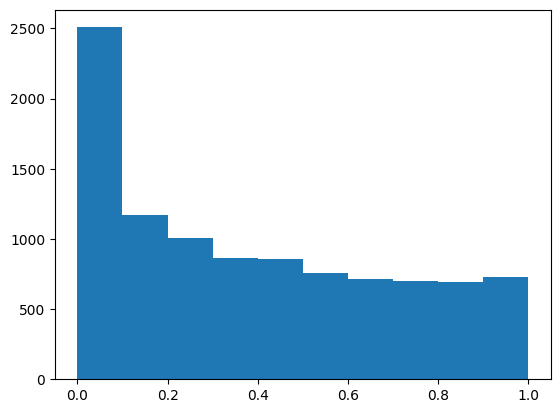

In [55]:
def test():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run_2()
    list_p_value.append(p_value)

    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test()

# Exercise 3



In [13]:
def run_3():

    #generate synthetic data
    n=10 #phản hồi loại thuốc
    mu=4 #du`ng de tao data x_obs, muc dich la tinh p_value de xac dinh mu=0 hay mu !=0
    std =1 #standard deviation (xich ma) - độ lệch chuẩn

    x_obs_1 = np.random.normal(loc=mu,scale=std,size=(1))
    x_obs_2 = np.random.normal(loc=mu,scale=std,size=(n))

    # print(x_obs)

    #we want to the following hypothesis
    #H_0: mu_1=mu_2 vs H_1: mu1!=mu_2
    # T_obs = x_obs_1[0] - sum(x_obs_2) / n
    T_obs = x_obs_1[0] - np.mean(x_obs_2)
    
    scale =  np.sqrt(1.1) 
    # Số 2 là variance còn scale phải lấy std = Căn bậc 2. 

    #compute p-value
    cdf = norm.cdf(T_obs, loc=0, scale=scale)
    p_value = 2 * min(cdf, 1 - cdf)
    # print(p_value)

    return p_value

run_3()

0.5117763985666715

Count:  507
FPR:  0.0507


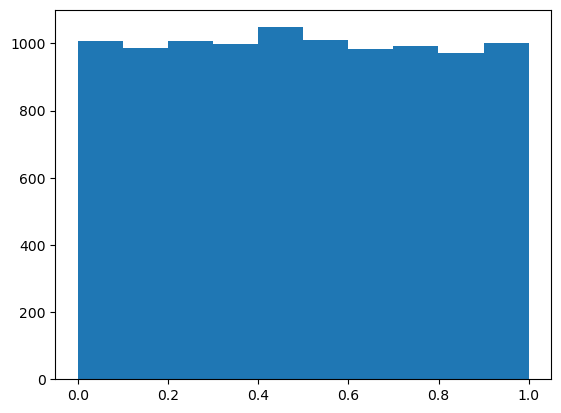

In [16]:
def test3():
  max_iteration =10000
  list_p_value =[]
  alpha = 0.05 #kiểm soát mức độ lỗi
  count=0

  for _ in range(max_iteration):
    p_value = run_3()
    list_p_value.append(p_value)
    # print(p_value)
    if p_value <= alpha:
      count +=1
  print('Count: ',count)
  print('FPR: ',count/max_iteration)

  # Plot the distribution of p-values
  list_p_value = np.array(list_p_value)
  list_p_value = list_p_value.flatten()
  plt.hist(list_p_value) #-> uniform distribution
  plt.show()

test3()

# Vector


In [ ]:
def run():
    n = 10
    mu = np.zeros((n, 1))
    Sigma = np.identity(n)
    
    x = np.random.multivariate_normal(mu.flatten(), Sigma)
    x = x.reshape((n, 1))
    
    eta = np.zeros((n, 1))
    
    eta[1] = 1.0
    
    # Construct test-statistic
    T = np.dot(eta.T, x)[0][0]
    
    # Distribution of T ~ N(mu1 - mu2)
    variance_T = np.dot(eta.T, np.dot(Sigma, eta))[0][0]
    sigma_T = np.sqrt(variance_T)
    
    cdf = norm.cdf(T, loc=0, scale=sigma_T)
    p_value = 2 * min(cdf, 1 - cdf)
    
    return p_value

In [17]:
n = 10
mu = np.zeros((n, 1))
Sigma = np.identity(n)

x = np.random.multivariate_normal(mu.flatten(), Sigma)
x = x.reshape((n, 1))

eta = np.zeros((n, 1))

eta[1] = 1.0